# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">2 hours</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">2 hours</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">3 hours</span>
* B. Hough Transform (Circles):  <span style="color:red;">8 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [3]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2

In [698]:
def color2gray(image):
    # Your code goes here
    result = image[:,:,0]*0.299 + image[:,:,1]*0.587 + image[:,:,2] * 0.114
    return result # returning [x,x,3] need [x,x,1]

(512, 512)


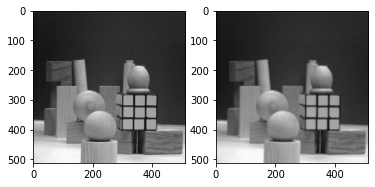

In [664]:
# blur image for better results
gauss_kern = np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]], dtype=np.int8)
blocks = cv2.imread('./blocks.png')
#blocks = color2gray(blocks)
#print(blocks.shape)
plt.subplot(121)
plt.imshow(blocks,vmin=0,vmax=255)
#blurred_blocks = blur_uniform3x3(blocks)
blurred_blocks = cv2.blur(blocks, (5,5))
blurred_blocks = color2gray(blurred_blocks)
plt.subplot(122)
plt.imshow(blurred_blocks,cmap="gray",vmin=0,vmax=255, aspect=1)

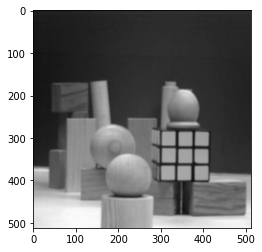

In [661]:
plt.imshow(blurred_blocks,cmap="gray",vmin=0,vmax=255, aspect=1)

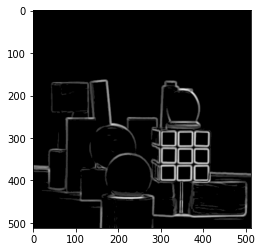

In [665]:
# Part 1. Compute the Gradient Magnitude
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
edge_det_x = ndimage.convolve(blurred_blocks, sobel_x)/8.0
edge_det_y = ndimage.convolve(blurred_blocks, sobel_y)/8.0

THRESHOLD = 5

final_edge_det = np.sqrt(np.power(edge_det_x,2) + np.power(edge_det_y,2))
final_edge_det = np.uint8(final_edge_det)
grad_mag = np.copy(final_edge_det)
rows, cols = final_edge_det.shape
for row in range(rows):
    for col in range(cols):
        if grad_mag[row,col] < THRESHOLD:
            grad_mag[row,col] = 0

# Show your results on the blocks image
plt.imshow(grad_mag,cmap="gray",vmin=grad_mag.min(), vmax=grad_mag.max())

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

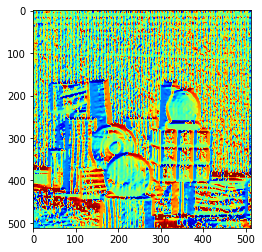

In [666]:
# Part 2. Compute the Gradient Orientation
    
grad_orien = np.arctan2(edge_det_x, edge_det_y) * (180 / np.pi)

# Show your results on the blocks image

plt.imshow(grad_orien,cmap="jet",vmin=grad_orien.min(), vmax=grad_orien.max())

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



float64
(512, 512)


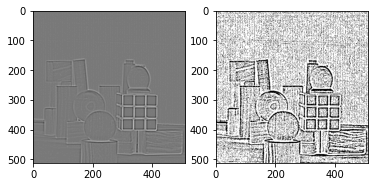

In [673]:
# Part 3. Find the Zero Crossings
lap_kern = np.array([[0,1,0],
                     [1,-4,1],
                     [0,1,0]])
lap_image = ndimage.convolve(blurred_blocks, lap_kern)
#lap_image = cv2.blur(lap_image, (5,5), 0)
#lap_image = np.int8(lap_image)
print(lap_image.dtype)
plt.subplot(121)
plt.imshow(lap_image, cmap="gray")
print(lap_image.shape)
rows, cols = lap_image.shape
zero_cross = np.zeros([rows, cols])
THRESHOLD = 4
# check x
for row in range(rows):
    prev = lap_image[row,0]
    for col in range(1,cols):
        curr = lap_image[row,col]
        if curr == 0:
            zero_cross[row,col] = 255
        if (prev<0) and (curr>0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
            zero_cross[row,col] = 255
        elif (prev>0) and (curr<0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
            zero_cross[row,col] = 255
        prev = curr
        # if zero or sign changes, set value
# check y
prev_cur_row = 0
prev_cur_col = 0
for row in range(1,rows):
    if prev_cur_col < 512:
        prev_row = lap_image[prev_cur_row]
        prev = prev_row[prev_cur_col]
    for col in range(cols):
        curr = lap_image[row,col]
        if curr == 0:
            zero_cross[row,col] = 255
        if (prev<0) and (curr>0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
            zero_cross[row,col] = 255
        elif (prev>0) and (curr<0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
            zero_cross[row,col] = 255
        prev_cur_col += 1
        if prev_cur_col < 512:
            prev = prev_row[prev_cur_col]
    prev_cur_row += 1
# Show the results on blocks image#
plt.subplot(122)
plt.imshow(zero_cross,cmap="gray",vmin=0, vmax=255)

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


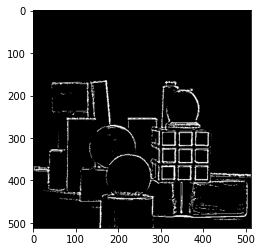

In [1146]:
# Part 4. Final Solution
chosen_points = []
rows, cols = grad_mag.shape
combined = np.zeros([rows, cols])
THRESHOLD = 4
for row in range(rows):
    for col in range(cols):
        if grad_mag[row,col] > THRESHOLD and zero_cross[row,col] == 0:
            chosen_points.append([row,col])

for points in chosen_points:
    combined[points[0],points[1]] = 255
# Show the results on blocks image
#combined = np.clip(combined, 0, 255)
#combined = np.int8(combined)
plt.imshow(combined,cmap="gray",vmin=0, vmax=255)

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
I felt that this part of the lab I was well prepared for. It helped me to better realize the relationship between the zero crossings and the gradient magnitudes. I was a little lost at first, but after some further investigating, I was able to figure it out.



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [683]:
def correct_color(image):
    final = np.dstack((image[:,:,2], image[:,:,1], image[:,:,0]))
    return final

In [771]:
def find_zero_crossings(lap_image):
    rows, cols = lap_image.shape
    zero_cross = np.zeros([rows, cols])
    THRESHOLD = 4
    # check x
    for row in range(rows):
        prev = lap_image[row,0]
        for col in range(1,cols):
            curr = lap_image[row,col]
            if curr == 0:
                zero_cross[row,col] = 255
            if (prev<0) and (curr>0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
                zero_cross[row,col] = 255
            elif (prev>0) and (curr<0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
                zero_cross[row,col] = 255
            prev = curr
            # if zero or sign changes, set value
    # check y
    prev_cur_row = 0
    prev_cur_col = 0
    for row in range(1,rows):
        if prev_cur_col < 256:
            prev_row = lap_image[prev_cur_row]
            prev = prev_row[prev_cur_col]
        for col in range(cols):
            curr = lap_image[row,col]
            if curr == 0:
                zero_cross[row,col] = 255
            if (prev<0) and (curr>0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
                zero_cross[row,col] = 255
            elif (prev>0) and (curr<0):# and (np.abs(prev) > THRESHOLD) and (np.abs(curr) > THRESHOLD):
                zero_cross[row,col] = 255
            prev_cur_col += 1
            if prev_cur_col < 256:
                prev = prev_row[prev_cur_col]
        prev_cur_row += 1
    return zero_cross

In [1098]:
def combine_gm_zc(gradient_magnitude, zero_crossing):
    chosen_points = []
    rows, cols = gradient_magnitude.shape
    combined = np.zeros([rows, cols])
    THRESHOLD = 10
    for row in range(rows):
        for col in range(cols):
            if gradient_magnitude[row,col] > THRESHOLD and zero_crossing[row,col] == 0:
                chosen_points.append([row,col])

    for points in chosen_points:
        combined[points[0],points[1]] = 255
    return combined

In [1125]:
def edge_detect(image):
    # gradient magnitude
    sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
    sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])  
    #image = cv2.blur(image, (5,5))
    mag_x = ndimage.convolve(image, sobel_x)/8.0
    mag_y = ndimage.convolve(image, sobel_y)/8.0
    gradient_magnitude = np.sqrt(np.power(mag_x,2) + np.power(mag_y,2))
    
    THRESHOLD = 10
    return_mag = np.copy(gradient_magnitude)
    rows, cols = gradient_magnitude.shape
    for row in range(rows):
        for col in range(cols):
                if return_mag[row,col] < THRESHOLD:
                    return_mag[row,col] = 0
                else:
                    return_mag[row,col] = 255

    lapsn_kern = np.array([[0,1,0],
                     [1,-4,1],
                     [0,1,0]])
    image = np.float64(image)
    lapsn_image = ndimage.convolve(image, lapsn_kern)
    #lapsn_image = cv2.blur(lapsn_image, (3,3))
    #lapsn_image = np.uint8(lapsn_image)
    #lapsn_image = np.clip(lapsn_image, 0, 255)
    zero_crossings = find_zero_crossings(lapsn_image)
    #zero_crossings = cv2.blur(zero_crossings, (7,7))
    combined_images = combine_gm_zc(gradient_magnitude, zero_crossings)
    #combined_images = cv2.blur(combined_images, (3,3))
    #print(combined_images.dtype)
    return combined_images # WILL NEED TO CHANGE 

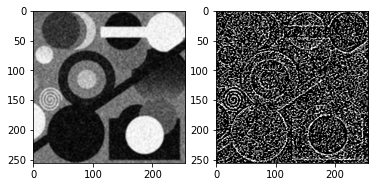

In [1159]:
circles = cv2.imread('./circles.png')
circles = correct_color(circles)
circles = cv2.blur(circles, (3,3))
gray_circles = color2gray(circles)
detections = []
for i in range(3):
    IMG = circles[:,:,i]
    ed_circles = edge_detect(IMG)
    detections.append(ed_circles)

plt.subplot(121)
plt.imshow(IMG, cmap="gray")
plt.subplot(122)
plt.imshow(detections[2], cmap="gray")


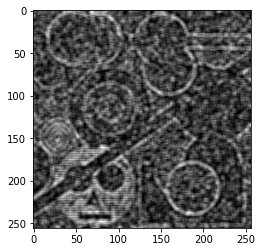

In [1178]:
rows, cols = detections[0].shape
testing = np.zeros([rows, cols])
#testing = np.copy(detections[0])
for detec in detections:
    testing = testing + detec
rows, cols = testing.shape
threshold = 256
for row in range(rows):
    for col in range(cols):
        if testing[row,col] < threshold:
            testing[row,col] = 0
test2 = cv2.blur(detections[0], (5,5))
plt.imshow(test2,cmap="gray")

100%|██████████| 3/3 [07:33<00:00, 151.01s/it]


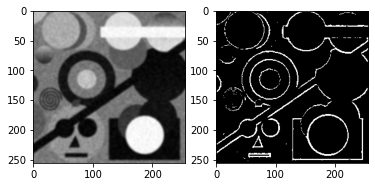

In [1183]:
# Part B - Hough Transform - code below
circles = cv2.imread('./circles.png')
easy_circle = cv2.imread('./simplecircle.png')
easy_circle = correct_color(easy_circle)
circles = correct_color(circles)
gray_easy_circle = color2gray(easy_circle)
circles = cv2.GaussianBlur(circles, (7,7),0)
gray_circles = color2gray(circles)

IMG = gray_circles
RADS = [16,32,64]
ed_circles = edge_detect(IMG)
plt.subplot(121)
plt.imshow(IMG, cmap="gray")
plt.subplot(122)
plt.imshow(ed_circles, cmap="gray")

# circle: (x-xc)^2 + (y-yc)^2 = r^2
# r can equal 32, 64, 96
# r can ACTUALLY equal 16, 32, 48
# r = 2
# x = 2
# y = 3
# (2-xc)^2 + (3-yc)^2 = 4
#accumulator_32 = []

#print(ed_circles[126])
# accumulate 32
from tqdm import tqdm
rows, cols = ed_circles.shape
voteds = []
for RAD in tqdm(RADS):
    voted = np.zeros([rows, cols])
    for row in range(rows):
        for col in range(cols):
            # if there is a value marked as an edge
            if ed_circles[row,col] == 255:
                for row_c in range(row-RAD, row+RAD):
                    for col_c in range(col-RAD, col+RAD):
                        temp = np.power((row-row_c),2) + np.power((col-col_c),2)
                        if temp == np.power(RAD,2):
                            temp_circ = np.zeros([rows, cols])
                            temp_circ = cv2.circle(temp_circ, (row, col), RAD, 1, 1)
                            voted = voted + temp_circ
    voteds.append(voted)
            
#plt.subplot(122)
#plt.imshow(voted, cmap="gray", vmin=0, vmax=255)

# Be sure to show all of the figures required in the description above


Below is a plot for R=16

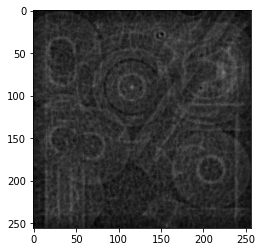

In [1180]:
plt.imshow(voteds[0], cmap="gray", vmin=0, vmax=255)

Below is a plot for R=32

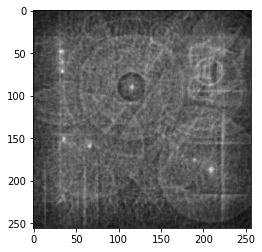

In [1181]:
plt.imshow(voteds[1], cmap="gray", vmin=0, vmax=255)

Below is a plot for R=64

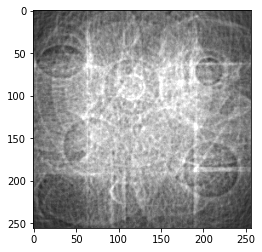

In [1182]:
plt.imshow(voteds[2], cmap="gray", vmin=0, vmax=255)

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
I thought that this part of the lab was fun. But I thought that I wasn't fully prepared for it. I was able to get the separate R,G,B edge detection almost working. But things went much smoother just using gray scale (which is why my accuracy isn't the best when it comes to choosing centers in my opinion). I think talking more about how to do circles would have been helpful. I got the line prediction down, but struggled applying that to circles for some reason.

